<a href="https://colab.research.google.com/github/danielbauer1979/FI830/blob/main/FI830_HW9_Sol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Structural Credit Risk Models
Let $D_0$ denote the total debt of the firm at time zero. Then the leverage ratio $L_0=\frac{D_0}{E_0}=\frac{D_0}{A_0 - D_0}$. Merton's structural model gives
$$
D_0(T) = D e^{-rT}-\left(D\,e^{-rT}\Phi(-d_2)-A_0\,\Phi(-d_1)\right),
$$
where $d_1=\frac{\text{log}(A_0/D)+(r+\sigma^2/2)T}{\sigma\sqrt{T}}$ and $d_2=d_1-\sigma\sqrt{T}$, where $D$ is the face amount.

In [29]:
import numpy as np
import scipy.stats as st
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [30]:
# Parameters
r = 0.05
sigma = 0.2
A_0 = 100

In [31]:
def Merton(A_0,D,T,sigma,r):
  N = st.norm.cdf
  d1 = (np.log(A_0/D)+(r+sigma**2/2)*T) / (sigma*np.sqrt(T))
  d2 = d1 - sigma * np.sqrt(T)
  D0 = D * np.exp(-r*T) - (D*np.exp(-r*T)*N(-d2) - A_0*N(-d1))
  return D0 

In [32]:
#Solve for principal that gives leverage
h=1
T_grid = np.arange(h,10+h,h)
D_10 = np.zeros(10)
D_3 = np.zeros(10)
D_1 = np.zeros(10)
D_1_3 = np.zeros(10)
D_1_10 = np.zeros(10)

for t in T_grid:
  lever = lambda D : 10 - Merton(A_0,D,t,sigma,r)/(A_0 - Merton(A_0,D,t,sigma,r)) 
  D_10[t-1] = fsolve(lever, 90)
  lever = lambda D : 3 - Merton(A_0,D,t,sigma,r)/(A_0 - Merton(A_0,D,t,sigma,r)) 
  D_3[t-1] = fsolve(lever, 60)
  lever = lambda D : 1 - Merton(A_0,D,t,sigma,r)/(A_0 - Merton(A_0,D,t,sigma,r)) 
  D_1[t-1] = fsolve(lever, 50)
  lever = lambda D : 0.333 - Merton(A_0,D,t,sigma,r)/(A_0 - Merton(A_0,D,t,sigma,r)) 
  D_1_3[t-1] = fsolve(lever, 20)
  lever = lambda D : 0.1 - Merton(A_0,D,t,sigma,r)/(A_0 - Merton(A_0,D,t,sigma,r)) 
  D_1_10[t-1] = fsolve(lever, 5)

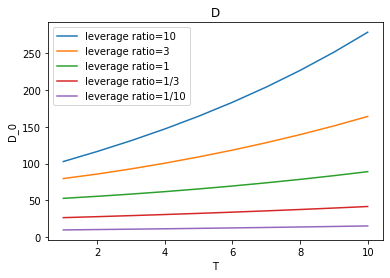

In [33]:
#Plot D_0(T) as a function of T
plt.plot(T_grid,D_10,label="leverage ratio=10") 
plt.plot(T_grid,D_3,label="leverage ratio=3")
plt.plot(T_grid,D_1,label="leverage ratio=1")
plt.plot(T_grid,D_1_3,label="leverage ratio=1/3")
plt.plot(T_grid,D_1_10,label="leverage ratio=1/10")
plt.title("D")
plt.xlabel("T")
plt.ylabel("D_0")
plt.legend()
plt.show()

We have $D=D_0(1+i)^T.$ Then,

$$
i=\left(\frac{D_0(T)}{D}\right)^{-1/T}-1.
$$

If assume continuous compound interest, then $D=D_0e^{iT} ⟺ i=-\frac{1}{T}\text{log}\left(\frac{D_0(T)}{D}\right).$

Credit spread is $i-r.$

In [ ]:
# Assume continuous compound
spread_10 = [-1/t*np.log(Merton(A_0,D_10[t-1],t,sigma,r)/D_10[t-1]) - r for t in T_grid] #leverage ratio = 10
spread_3 = [-1/t*np.log(Merton(A_0,D_3[t-1],t,sigma,r)/D_3[t-1]) - r for t in T_grid] #leverage ratio = 3
spread_1 = [-1/t*np.log(Merton(A_0,D_1[t-1],t,sigma,r)/D_1[t-1]) - r for t in T_grid] #leverage ratio = 1
spread_1_3 = [-1/t*np.log(Merton(A_0,D_1_3[t-1],t,sigma,r)/D_1_3[t-1]) - r for t in T_grid] #leverage ratio = 1/3
spread_1_10 = [-1/t*np.log(Merton(A_0,D_1_10[t-1],t,sigma,r)/D_1_10[t-1]) - r for t in T_grid] #leverage ratio = 1/10
spread_1_10

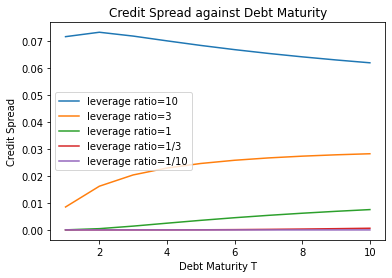

In [35]:
#Plot credit spread as a function of T
plt.plot(T_grid,spread_10,label="leverage ratio=10")
plt.plot(T_grid,spread_3,label="leverage ratio=3")
plt.plot(T_grid,spread_1,label="leverage ratio=1")
plt.plot(T_grid,spread_1_3,label="leverage ratio=1/3")
plt.plot(T_grid,spread_1_10,label="leverage ratio=1/10")
plt.title("Credit Spread against Debt Maturity")
plt.xlabel("Debt Maturity T")
plt.ylabel("Credit Spread")
plt.legend()
plt.show()

# Credit Risk Derivatives (constant interest rate)

We have 
$$
d\lambda_t = \alpha(\beta-\lambda_t)dt-\gamma dW_t
$$

The premium leg of a CDS contract is 
$$
PL = P \sum_{k=0}^{K-1}e^{-r\cdot t_k}e^{-A(0,t_k)\lambda_0-D(0,t_k)}(t_{k+1}-t_{k})
$$

The default leg (or protection leg) is
$$
DL = Q(1-\delta)\sum_{k=1}^K e^{-r\cdot t_k}\left(e^{-A(0,t_{k-1})\lambda_0-D(0,t_{k-1})} - e^{-A(0,t_{k})\lambda_0-D(0,t_{k})}\right)
$$

We get premium $P$ by solving $PL=DL.$

In [36]:
# Parameters
r = 0.03
alpha = 0.2
beta = 0.015
gamma = 0.02
delta = 0.5
lambda0 = 0.01
Q = 1
T = 2

In [37]:
def anal_Vasicek(t,T,r_0):
  A_t_T = (1-np.exp(-alpha*(T-t)))/alpha
  D_t_T = (gamma**2/(2*alpha**2)-beta)*(A_t_T-(T-t))+(gamma**2/(4*alpha))*A_t_T**2
  return np.exp(-r_0*A_t_T-D_t_T)

In [38]:
h = 1/12
time_grid = np.arange(0,T,h)
PL = sum([np.exp(-r*t)*anal_Vasicek(0,t,lambda0)*h for t in time_grid])
time_grid2 = np.arange(h,T+h,h)
DL = Q*(1-delta)*sum([np.exp(-r*t)*(anal_Vasicek(0,t-h,lambda0)-anal_Vasicek(0,t,lambda0)) for t in time_grid2])
P = DL/PL
print("Premium is $%.4f" % P)

Premium is $0.0053


Alternatively,
$$
\begin{align*}
PL &= \mathbb{E}^{\mathbb{Q}}\left[\int_0^T e^{-rt}e^{-\int_0^t\lambda_s ds}dt\right] \\
&=\int_0^T e^{-rt}e^{-A(0,t)\lambda_0-D(0,t)}dt
\end{align*}
$$
and
$$
\begin{align*}
DL &= \mathbb{E}^{\mathbb{Q}}\left[\int_0^T e^{-rt}e^{-\int_0^t\lambda_s ds}\lambda_t dt\right] \\
&=\mathbb{E}^{\mathbb{Q}}\left[\int_0^T e^{-rt}e^{-A(0,t)\lambda_0-D(0,t)}\lambda_t dt\right] \\
&\approx \mathbb{E}^{\mathbb{Q}}\left[\frac{1}{2}\lambda_0+\sum_{k=1}^{K-1}e^{-rt_k}e^{-A(0,t_k)\lambda_0-D(0,t_k)}\lambda_{t_k} + \frac{1}{2}e^{-rT}e^{-A(0,T)\lambda_0-D(0,T)}\lambda_T\right]
\end{align*}
$$

In [39]:
def MCDefaultleg(lambda0,h,T,N):
  DL = [0] * N
  for n in range(N):
    k = int(T/h+1)
    lambda_t = [lambda0] * k
    D_arr = [lambda0] * k
    Z = np.random.normal(0,1,k-1)
    tgrid = np.arange(0,T+h,h)
    for i in range(1,k):
      lambda_t[i] = lambda_t[i-1] + alpha*(beta-lambda_t[i-1])*h + gamma*np.sqrt(h)*Z[i-1]
      D_arr[i] =  np.exp(-r*tgrid[i])*anal_Vasicek(0,tgrid[i],lambda0)*lambda_t[i]
    DL[n] = (0.5*D_arr[0]+sum(D_arr[1:-1])+0.5*D_arr[-1])*h
  return np.average(DL)

def integrandPL(t):
  return np.exp(-r*t)*anal_Vasicek(0,t,lambda0)

In [57]:
PL = quad(integrandPL,0,T)[0]
DL = Q*(1-delta)*MCDefaultleg(lambda0,1/365,T,1000)
P = DL/PL
print("Premium is $%.4f" % P)

Premium is $0.0055


# Credit Risk Derivatives (stochastic interest rate)
Assume a stochastic interest rate $r_t$ and a stochastic default intensity $\lambda_t:$
$$
\begin{align*}
r_t &= X_t \\
\lambda_t &= 0.1X_t + 0.1Y_t,
\end{align*}
$$
where
$$
\begin{align*}
dX_t &= \alpha_1(\beta_1-X_t)dt+\gamma_1dW_t^{(1)} \\
dY_t &= \alpha_2(\beta_2-Y_t)dt+\gamma_2dW_t^{(2)}
\end{align*}
$$
$W_t^{(1)}$ and $W_t^{(2)}$ are independent Brownian motions.

Now the premium leg 
$$
\begin{align*}
PL &= P\cdot \sum_{k=0}^{K-1} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}r_s+\lambda_s\,ds}\right] (t_{k+1}-t_{k}) \\
&= P\cdot \sum_{k=0}^{K-1} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}X_s+0.1X_s+0.1Y_s\,ds}\right] (t_{k+1}-t_{k}) \\
&= P\cdot \sum_{k=0}^{K-1} e^{-A(0,t_k,\alpha_1,1.1\beta_1,1.1\gamma_1)X_0-D(0,t_k,\alpha_1,1.1\beta_1,1.1\gamma_1)}e^{-A(0,t_k,\alpha_2,0.1\beta_2,0.1\gamma_2)Y_0-D(0,t_k,\alpha_2,0.1\beta_2,0.1\gamma_2)}(t_{k+1}-t_{k}) 
\end{align*}
$$
The default leg
$$
\begin{align*}
DL &= Q(1-\delta)\sum_{k=1}^{K} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}r_s\,ds}\left(\mathbb{1}_{\{\tau\geq t_{k-1}\}}-\mathbb{1}_{\{\tau\geq t_{k}\}}\right)\right] \\
&= Q(1-\delta)\sum_{k=1}^{K} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}r_s\,ds}\left(e^{-\int_0^{t_{k-1}}\lambda_s ds}-e^{-\int_0^{t_k}\lambda_s ds}\right)\right] \\
&= Q(1-\delta)\sum_{k=1}^{K} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_{k-1}}r_s+\lambda_s\,ds}e^{-\int_{t_{k-1}}^{t_k}r_s\,ds}\right]-\mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}r_s+\lambda_s\,ds}\right] \\
&= Q(1-\delta)\sum_{k=1}^{K} \mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_{k-1}}1.1X_s+0.1Y_s\,ds}\mathbb{E}\left[e^{-\int_{t_{k-1}}^{t_k}X_s\,ds}\vert X_{t_{k-1}}\right]\right]-\mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}1.1X_s+0.1Y_s\,ds}\right] \\
&= Q(1-\delta) \left(\underbrace{\mathbb{E}^{\mathbb{Q}}\left[\sum_{k=1}^{K} e^{-\int_0^{t_{k-1}}1.1X_s+0.1Y_s\,ds} e^{-A(t_{k-1},t_k,\alpha_1,\beta_1,\gamma_1)X_{t_{k-1}}-D(t_{k-1},t_k,\alpha_1,\beta_1,\gamma_1)}\right]}_{=DL_1}-\sum_{k=1}^{K}\mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}1.1X_s\,ds}\right]\mathbb{E}^{\mathbb{Q}}\left[e^{-\int_0^{t_k}0.1Y_s\,ds}\right]\right)
\end{align*}
$$
We can evaluate $DL_1$ by Monte Carlo simulations.


In [41]:
# Parameters
alpha1 = 0.5
beta1 = 0.05
gamma1 = 0.05
alpha2 = 0.1
beta2 = 0.1
gamma2 = 0.025
X0 = 0.03
Y0 = 0.08
delta = 0.5
Q = 1
T = 2

In [42]:
def anal_Vasicek2(t,T,r_0,alpha,beta,gamma):
  A_t_T = (1-np.exp(-alpha*(T-t)))/alpha
  D_t_T = (gamma**2/(2*alpha**2)-beta)*(A_t_T-(T-t))+(gamma**2/(4*alpha))*A_t_T**2
  return np.exp(-r_0*A_t_T-D_t_T)

In [85]:
N = 1000
h = 1/12
DL1 = [0]*N
DL2 = [0]*N
tgrid = np.arange(h,T+h,h)
for n in range(N):
  k = int(T/h)
  # Initial values
  X_t = [X0] * (k+1)
  Y_t = [Y0] * (k+1)
  Z_t = [1.1*X0+0.1*Y0]
  CF = [0] * k
  CF2 = [0] * k
  Z1 = np.random.normal(0,1,k)
  Z2 = np.random.normal(0,1,k)
  CF[0] = 1
  for i in range(1,k):
    # Simulate X_t and Y_t from t=0 --> t_1 --> ... --> t_{k-1} 
    X_t[i] = X_t[i-1] + alpha1*(beta1-X_t[i-1])*h + gamma1*np.sqrt(h)*Z1[i-1]
    Y_t[i] = Y_t[i-1] + alpha2*(beta2-Y_t[i-1])*h + gamma2*np.sqrt(h)*Z2[i-1]
    Z_t = np.append(Z_t,1.1*X_t[i] + 0.1*Y_t[i]) # Z_t = 1.1X_t + 0.1Y_t
    # Approximate \int_0^{t_{k-1}} Z_s ds by trapezoidal rule
    Zhat = (0.5*Z_t[0] + sum(Z_t[1:-1]) + 0.5*Z_t[-1]) * h
    # Evaluate cash flows at t = t_1, ... , t_K
    CF[i] = np.exp(-Zhat)*anal_Vasicek2(tgrid[i-1],tgrid[i],X_t[i],alpha1,beta1,gamma1)
    CF2[i-1] = np.exp(-Zhat)
  DL1[n] = sum(CF)
  X_t[k] = X_t[k-1] + alpha1*(beta1-X_t[k-1])*h + gamma1*np.sqrt(h)*Z1[k-1]
  Y_t[k] = Y_t[k-1] + alpha2*(beta2-Y_t[k-1])*h + gamma2*np.sqrt(h)*Z2[k-1]
  Z_t = np.append(Z_t,1.1*X_t[k] + 0.1*Y_t[k])
  Zhat = (0.5*Z_t[0] + sum(Z_t[1:-1]) + 0.5*Z_t[-1]) * h
  CF2[k-1] = np.exp(-Zhat)
  DL2[n] = sum(CF2) 

In [84]:
DL = Q*(1-delta)*(np.average(DL1) - np.average(DL2))
PL = sum([anal_Vasicek2(0,t,1.1*X0,alpha1,1.1*beta1,1.1*gamma1) * anal_Vasicek2(0,t,0.1*Y0,alpha2,0.1*beta2,0.1*gamma2) * h for t in time_grid])
P = DL/PL
print("Premium is $%.4f" % P)

Premium is $0.0066
